In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [526]:
diabetes=pd.read_csv("/Users/chauhanabhishek/Downloads/diabetes.csv")

In [527]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [528]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [422]:
diabetes.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

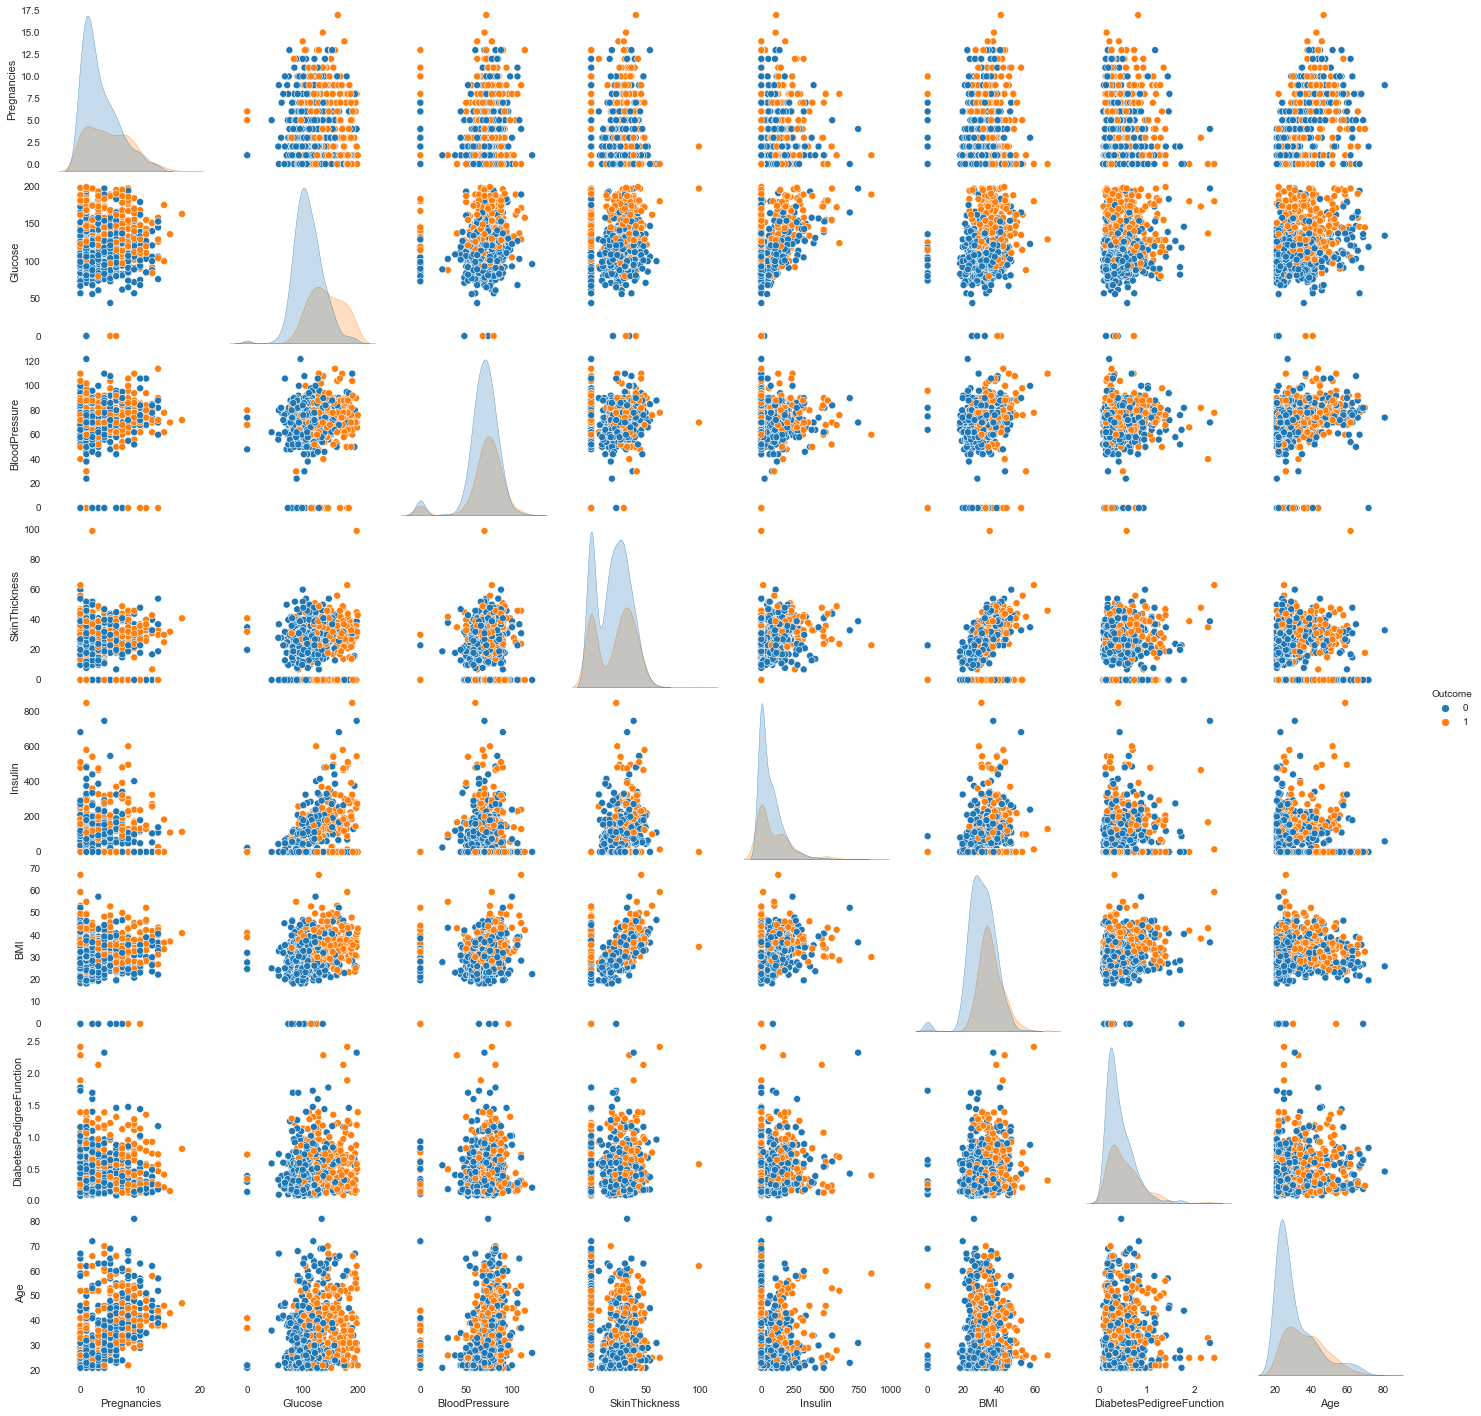

In [256]:
sns.pairplot(diabetes,hue="Outcome")

In [257]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [179]:
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [69]:
from pandas_profiling import ProfileReport
prof=ProfileReport(diabetes)
prof.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_profiling/visualisation/plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu").copy()
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [180]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [181]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [529]:
x=diabetes.iloc[:,:8]
y=diabetes.iloc[:,-1]

In [530]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [531]:
ii=IterativeImputer(missing_values=0)

In [532]:
transfromed=ii.fit_transform(x)

In [533]:
df=pd.DataFrame(transfromed,columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

In [534]:
df = pd.concat([df,y], axis=1)

In [535]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000  220.156268  33.6   
1       1.000000     85.0           66.0      29.000000   71.708223  26.6   
2       8.000000    183.0           64.0      21.272711  264.559960  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       4.228723    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000  160.705646  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      28.201450  178.033117  30.1   
767     1.000000     93.0           70.0      31.000000   88.198512  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                       0.351  31.0        0  
2                       0.672  32.0        1  
3                       0.167  21.0        0  
4                       2.288  33.0        1  
..                        ...   ...      ...  
763                     0.171  63.0        0  
764                     0.340  27.0        0  
765                     0.245  30.0        0  
766                     0.349  47.0        1  
767                     0.315  23.0        0  

[768 rows x 9 columns]

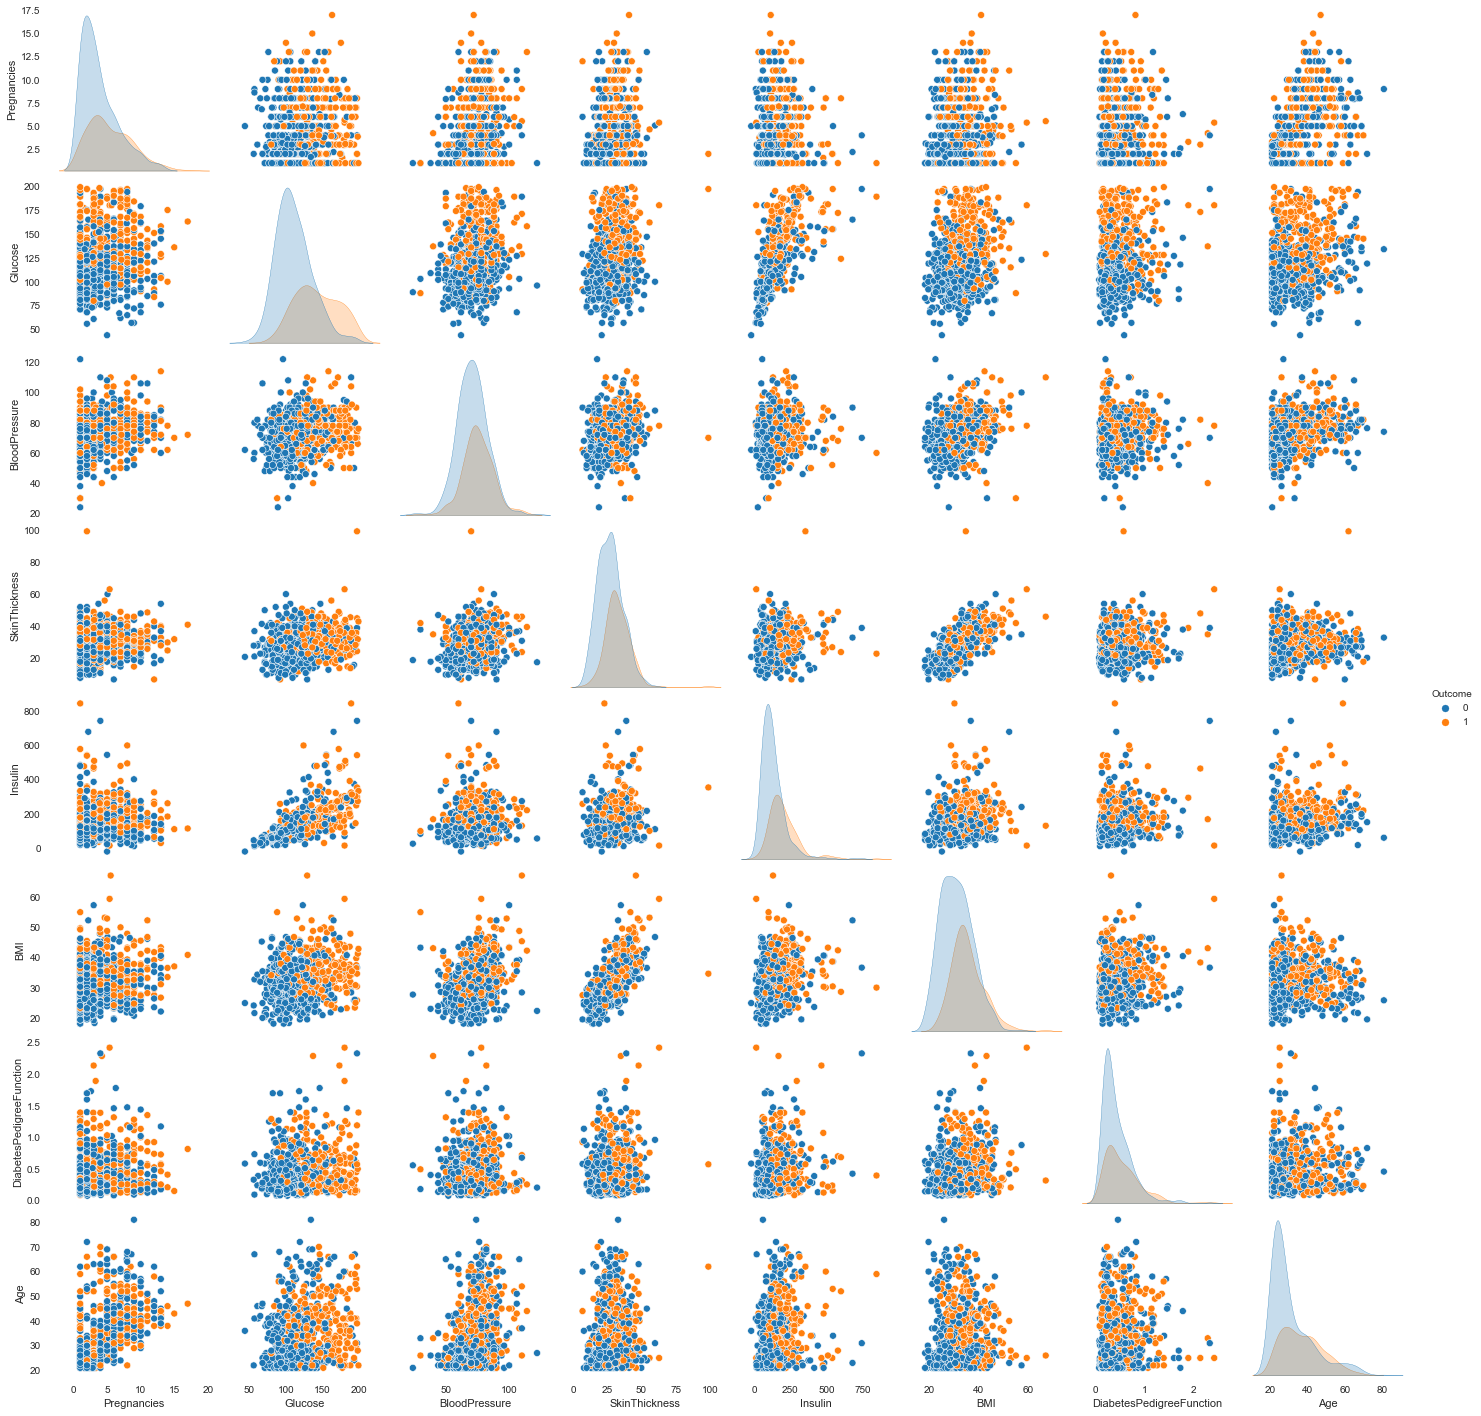

In [202]:
sns.pairplot(df,hue="Outcome")

In [430]:
x=df.iloc[:,:8]
y=df.iloc[:,8]

In [234]:
#y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [235]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [242]:
"""step1=ColumnTransformer(transformers=[
                                ("col_tnf2",PowerTransformer(),[0,1,2,3,4,5,6,7])
],remainder="passthrough")

step2=LogisticRegression()

pipe=Pipeline([
               ("step1",step1),
               ("step2",step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("Accuracy Score=",accuracy_score(y_test,y_pred))
print("Cross Validation=",np.mean(cross_val_score(step2,x_train,y_train,scoring='accuracy',cv=5)))"""

Accuracy Score= 0.7987012987012987
Cross Validation= 0.7557377049180328


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [250]:
"""step1=ColumnTransformer(transformers=[
                                ("col_tnf2",PowerTransformer(),[0,2,3,4,5,6,7])
],remainder="passthrough")

step2=SVC(kernel="linear")

pipe=Pipeline([
               ("step1",step1),
               ("step2",step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("Accuracy Score=",accuracy_score(y_test,y_pred))
print("Cross Validation=",np.mean(cross_val_score(step2,x_train,y_train,scoring='accuracy',cv=5)))"""

Accuracy Score= 0.8051948051948052
Cross Validation= 0.7589897374383581


In [265]:
##Removing Outliers

In [536]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000  220.156268  33.6   
1       1.000000     85.0           66.0      29.000000   71.708223  26.6   
2       8.000000    183.0           64.0      21.272711  264.559960  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       4.228723    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000  160.705646  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      28.201450  178.033117  30.1   
767     1.000000     93.0           70.0      31.000000   88.198512  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                       0.351  31.0        0  
2                       0.672  32.0        1  
3                       0.167  21.0        0  
4                       2.288  33.0        1  
..                        ...   ...      ...  
763                     0.171  63.0        0  
764                     0.340  27.0        0  
765                     0.245  30.0        0  
766                     0.349  47.0        1  
767                     0.315  23.0        0  

[768 rows x 9 columns]

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [538]:

df.corr()["Outcome"]

Pregnancies                 0.254593
Glucose                     0.495217
BloodPressure               0.175297
SkinThickness               0.277981
Insulin                     0.359674
BMI                         0.314564
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies'>

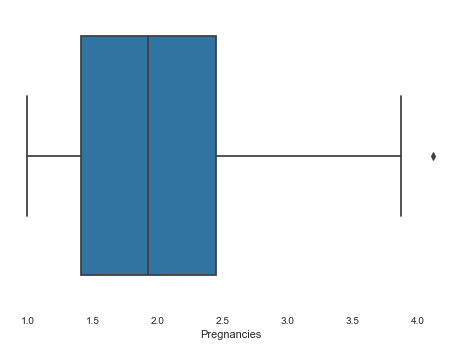

In [539]:
sns.boxplot(np.sqrt(df["Pregnancies"]))

In [540]:
df["Pregnancies"]=np.sqrt(df["Pregnancies"])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

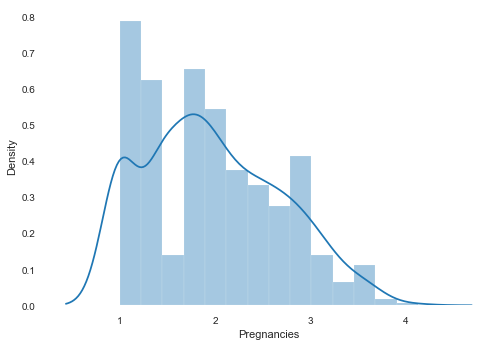

In [541]:
sns.distplot(df["Pregnancies"])

In [542]:
df=df[df["Pregnancies"]<df["Pregnancies"].quantile(.999)]



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

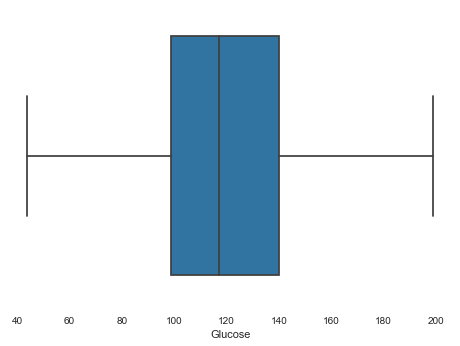

In [543]:
sns.boxplot(df["Glucose"])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

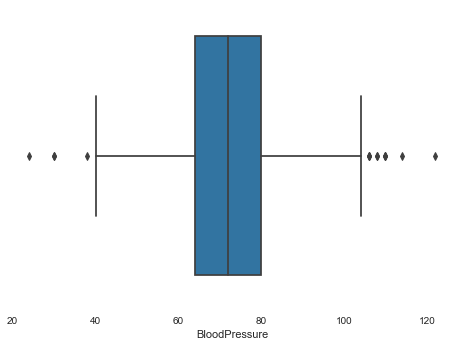

In [544]:
sns.boxplot(df["BloodPressure"])

In [545]:
df=df[(df["BloodPressure"]>df["BloodPressure"].quantile(0.01)) & (df["BloodPressure"]<df["BloodPressure"].quantile(0.99))]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

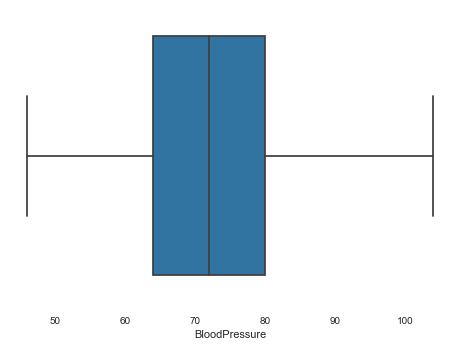

In [546]:
sns.boxplot(df["BloodPressure"])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinThickness'>

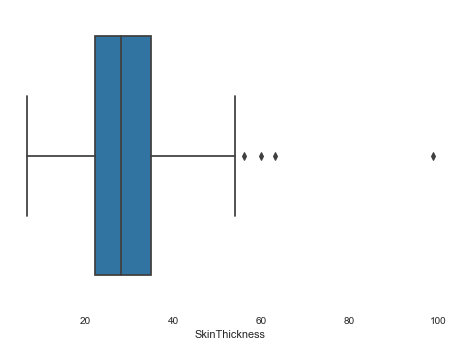

In [547]:
sns.boxplot(df["SkinThickness"])

In [548]:
df=df[df["SkinThickness"]<df["SkinThickness"].quantile(0.99)]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinThickness'>

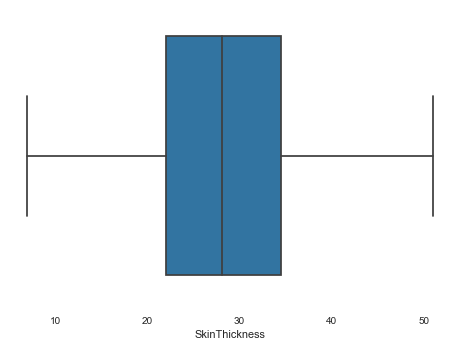

In [549]:
sns.boxplot(df["SkinThickness"])

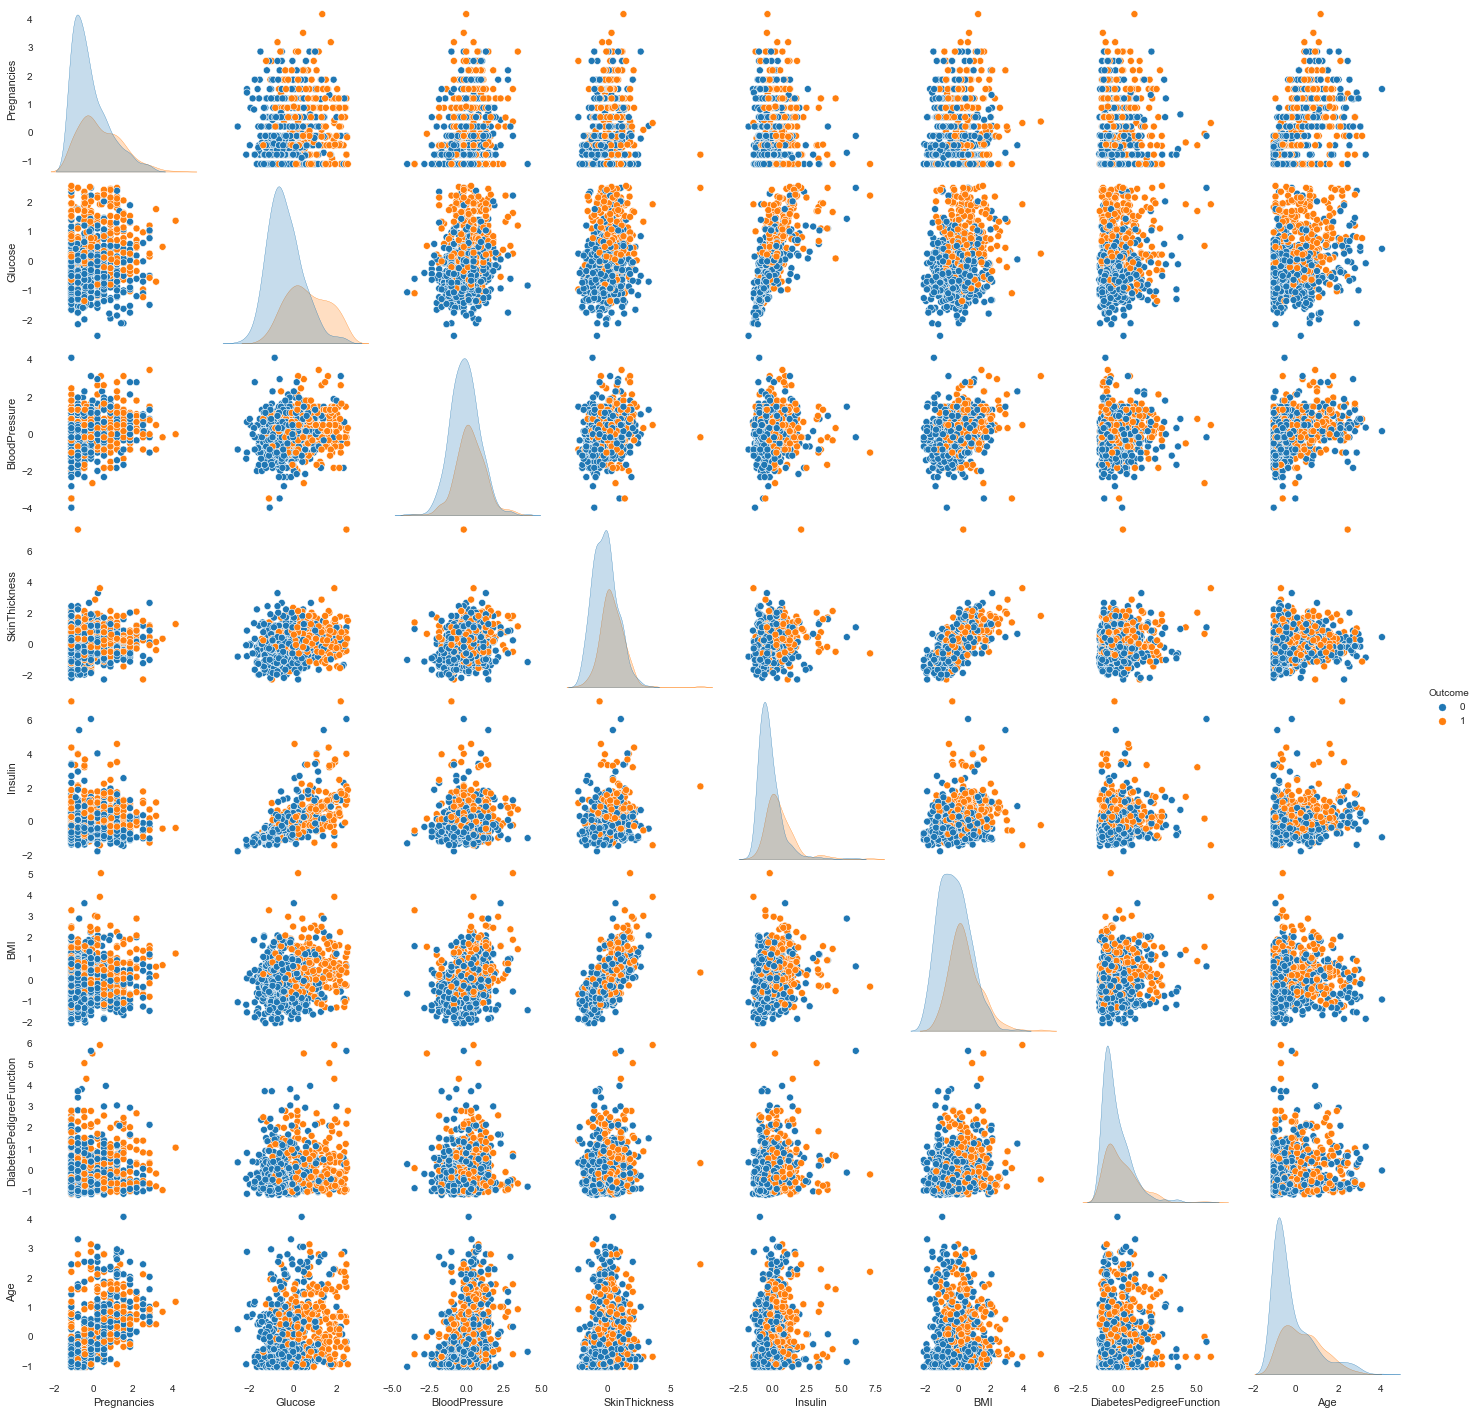

In [306]:
sns.pairplot(df1,hue="Outcome")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

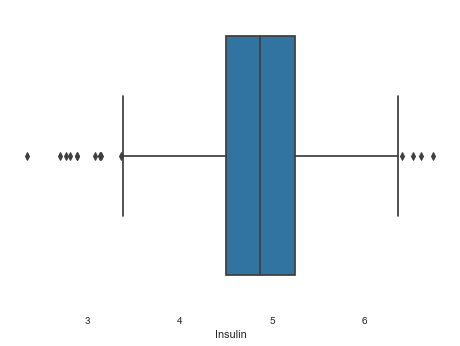

In [550]:
sns.boxplot(np.log(df["Insulin"]))

In [551]:
df["Insulin"]=np.log(df["Insulin"])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [552]:
df=df[(df["Insulin"]>df["Insulin"].quantile(0.05)) & (df["Insulin"]<df["Insulin"].quantile(0.99))]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

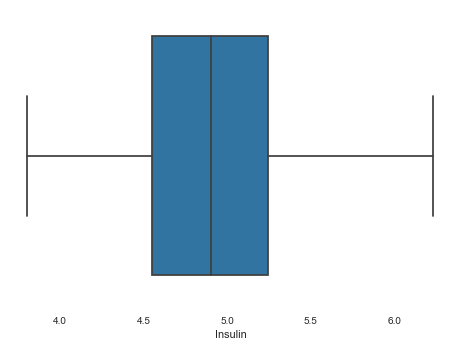

In [553]:
sns.boxplot(df["Insulin"])

In [554]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
0       2.449490    148.0           72.0      35.000000  5.394338  33.6   
1       1.000000     85.0           66.0      29.000000  4.272605  26.6   
2       2.828427    183.0           64.0      21.272711  5.578068  23.3   
3       1.000000     89.0           66.0      23.000000  4.543295  28.1   
5       2.236068    116.0           74.0      21.985277  4.819245  25.6   
..           ...      ...            ...            ...       ...   ...   
763     3.162278    101.0           76.0      48.000000  5.192957  32.9   
764     1.414214    122.0           70.0      27.000000  5.079574  36.8   
765     2.236068    121.0           72.0      23.000000  4.718499  26.2   
766     1.000000    126.0           60.0      28.201450  5.181970  30.1   
767     1.000000     93.0           70.0      31.000000  4.479590  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                       0.351  31.0        0  
2                       0.672  32.0        1  
3                       0.167  21.0        0  
5                       0.201  30.0        0  
..                        ...   ...      ...  
763                     0.171  63.0        0  
764                     0.340  27.0        0  
765                     0.245  30.0        0  
766                     0.349  47.0        1  
767                     0.315  23.0        0  

[694 rows x 9 columns]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

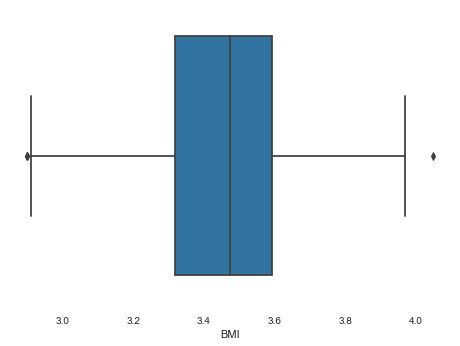

In [558]:
sns.boxplot(np.log(df["BMI"]))

In [560]:
df["BMI"]=np.log(df["BMI"])

In [564]:
df=df[(df["BMI"]>df["BMI"].quantile(0.001)) & (df["BMI"]<df["BMI"].quantile(0.998))]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

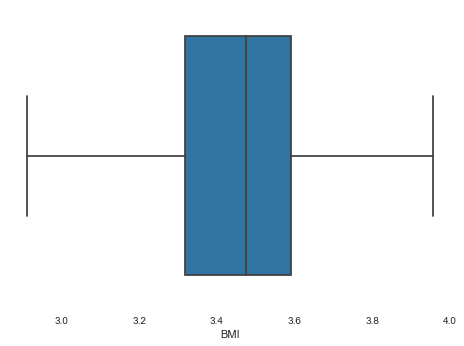

In [565]:
sns.boxplot(df["BMI"])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

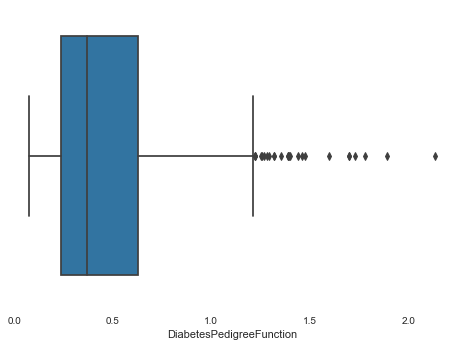

In [568]:
sns.boxplot(df["DiabetesPedigreeFunction"])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

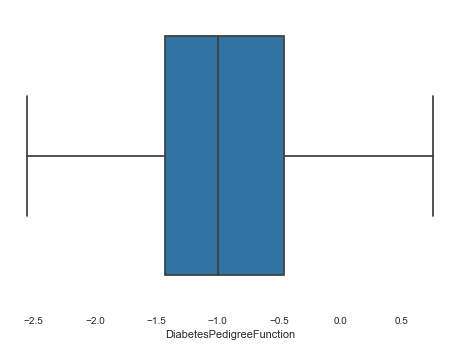

In [569]:
sns.boxplot(np.log(df["DiabetesPedigreeFunction"]))

In [570]:
df["DiabetesPedigreeFunction"]=np.log(df["DiabetesPedigreeFunction"])

/var/folders/6f/hfgl3pc12n55mx8_0h6sgbfh0000gn/T/ipykernel_29639/1941537556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DiabetesPedigreeFunction"]=np.log(df["DiabetesPedigreeFunction"])


In [571]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       2.449490    148.0           72.0      35.000000  5.394338  3.514526   
1       1.000000     85.0           66.0      29.000000  4.272605  3.280911   
2       2.828427    183.0           64.0      21.272711  5.578068  3.148453   
3       1.000000     89.0           66.0      23.000000  4.543295  3.335770   
5       2.236068    116.0           74.0      21.985277  4.819245  3.242592   
..           ...      ...            ...            ...       ...       ...   
763     3.162278    101.0           76.0      48.000000  5.192957  3.493473   
764     1.414214    122.0           70.0      27.000000  5.079574  3.605498   
765     2.236068    121.0           72.0      23.000000  4.718499  3.265759   
766     1.000000    126.0           60.0      28.201450  5.181970  3.404525   
767     1.000000     93.0           70.0      31.000000  4.479590  3.414443   

     DiabetesPedigreeFunction   Age  Outcome  
0                   -0.466809  50.0        1  
1                   -1.046969  31.0        0  
2                   -0.397497  32.0        1  
3                   -1.789761  21.0        0  
5                   -1.604450  30.0        0  
..                        ...   ...      ...  
763                 -1.766092  63.0        0  
764                 -1.078810  27.0        0  
765                 -1.406497  30.0        0  
766                 -1.052683  47.0        1  
767                 -1.155183  23.0        0  

[689 rows x 9 columns]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

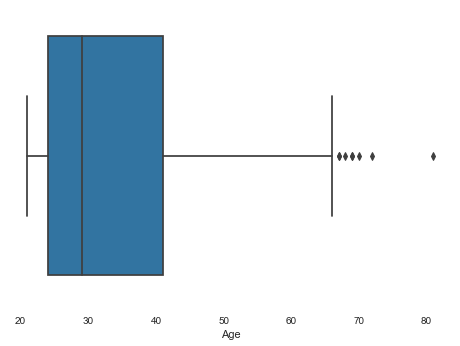

In [574]:
sns.boxplot(df["Age"])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

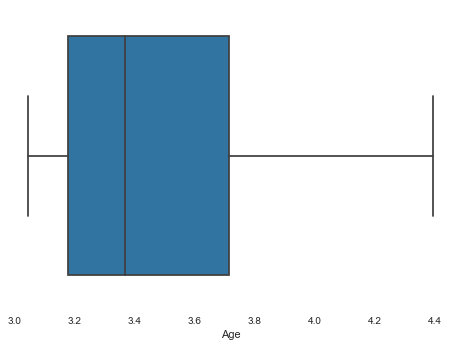

In [575]:
sns.boxplot(np.log(df["Age"]))

In [576]:
df["Age"]=np.log(df["Age"])

/var/folders/6f/hfgl3pc12n55mx8_0h6sgbfh0000gn/T/ipykernel_29639/3271101119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"]=np.log(df["Age"])


In [580]:
x=df.iloc[:,:8]
y=df.iloc[:,8]

In [581]:
from sklearn.preprocessing import StandardScaler

In [583]:
ss=StandardScaler()

In [584]:
x_scaled=ss.fit_transform(x)

In [586]:
lr=LogisticRegression()

In [587]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2)

In [591]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Accuracy Score=",accuracy_score(y_test,y_pred))
print("Cross Validation=",np.mean(cross_val_score(lr,x_train,y_train,scoring='accuracy',cv=5)))

Accuracy Score= 0.8043478260869565
Cross Validation= 0.7496314496314496


In [595]:
svm=SVC(kernel="linear")

In [596]:
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
print("Accuracy Score=",accuracy_score(y_test,y_pred))
print("Cross Validation=",np.mean(cross_val_score(svm,x_train,y_train,scoring='accuracy',cv=5)))

Accuracy Score= 0.8115942028985508
Cross Validation= 0.7442096642096642
